In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
df = pd.read_excel('distance_table.xls')

In [144]:
print(df)

  Unnamed: 0    SH    BJ    TJ    GZ    WH    CS    CD   SGP   TKY    MB
0         SH     0  1068   962  1212   690  1089  1658  3809  1755  5040
1         BJ  1068     0   108  1890  1055  1339  1516  4477  2092  4752
2         TJ   962   108     0  1820   988  1277  1519  4417  2016  4796
3         GZ  1212  1890  1820     0   836   566  1238  2631  2900  4205
4         WH   690  1055   988   836     0   293   976  3439  2421  4352
5         CS  1089  1339  1277   566   293     0   905  3143  2643  4195
6         CD  1658  1516  1519  1238   976   905     0  3264  3341  3394
7        SGP  3809  4477  4417  2631  3439  3143  3264     0  5315  3907
8        TKY  1755  2092  2016  2900  2421  2643  3341  5315     0  6730
9         MB  5040  4752  4796  4205  4352  4195  3394  3907  6730     0


In [145]:
D = df.values

In [146]:
D = np.delete(D,0,axis=1)

In [147]:
print(D)

[[0 1068 962 1212 690 1089 1658 3809 1755 5040]
 [1068 0 108 1890 1055 1339 1516 4477 2092 4752]
 [962 108 0 1820 988 1277 1519 4417 2016 4796]
 [1212 1890 1820 0 836 566 1238 2631 2900 4205]
 [690 1055 988 836 0 293 976 3439 2421 4352]
 [1089 1339 1277 566 293 0 905 3143 2643 4195]
 [1658 1516 1519 1238 976 905 0 3264 3341 3394]
 [3809 4477 4417 2631 3439 3143 3264 0 5315 3907]
 [1755 2092 2016 2900 2421 2643 3341 5315 0 6730]
 [5040 4752 4796 4205 4352 4195 3394 3907 6730 0]]


In [148]:
D2 = np.square(D)

In [149]:
print(D2)

[[0 1140624 925444 1468944 476100 1185921 2748964 14508481 3080025
  25401600]
 [1140624 0 11664 3572100 1113025 1792921 2298256 20043529 4376464
  22581504]
 [925444 11664 0 3312400 976144 1630729 2307361 19509889 4064256 23001616]
 [1468944 3572100 3312400 0 698896 320356 1532644 6922161 8410000
  17682025]
 [476100 1113025 976144 698896 0 85849 952576 11826721 5861241 18939904]
 [1185921 1792921 1630729 320356 85849 0 819025 9878449 6985449 17598025]
 [2748964 2298256 2307361 1532644 952576 819025 0 10653696 11162281
  11519236]
 [14508481 20043529 19509889 6922161 11826721 9878449 10653696 0 28249225
  15264649]
 [3080025 4376464 4064256 8410000 5861241 6985449 11162281 28249225 0
  45292900]
 [25401600 22581504 23001616 17682025 18939904 17598025 11519236 15264649
  45292900 0]]


In [150]:
summation = np.sum(D2,axis=1)/D2.shape[0]
Di = np.repeat(summation[:,np.newaxis],D2.shape[0],axis=1)
Dj = np.repeat(summation[np.newaxis,:],D2.shape[0],axis=0)
Dij = np.sum(D2)/((D2.shape[0])**2)*np.ones([D2.shape[0],D2.shape[0]])
B = (Di+Dj-D2-Dij)/2
B = B.astype(np.float64)

In [151]:
print(B)

[[ 1.17177761e+06  9.01164810e+05  9.49225610e+05  8.64767600e+04
   4.33445260e+05  4.68481600e+04 -5.49807590e+05 -1.78642804e+06
   2.95905201e+06 -4.21175459e+06]
 [ 9.01164810e+05  1.77117601e+06  1.70581481e+06 -6.65402040e+05
   4.14681960e+05  4.30473600e+04 -2.47543900e+04 -4.25425284e+06
   2.61053171e+06 -2.50200739e+06]
 [ 9.49225610e+05  1.70581481e+06  1.65211761e+06 -5.95081240e+05
   4.23593260e+05  6.46141600e+04 -8.88360900e+04 -4.04696204e+06
   2.70710651e+06 -2.77159259e+06]
 [ 8.64767600e+04 -6.65402040e+05 -5.95081240e+05  4.70119910e+05
  -2.87815900e+04  1.28801810e+05 -2.92476440e+05  1.65590311e+06
  -5.67643400e+04 -7.02795940e+05]
 [ 4.33445260e+05  4.14681960e+05  4.23593260e+05 -2.87815900e+04
   1.71212910e+05  9.66018100e+04 -1.51895940e+05 -9.45830390e+05
   1.06816166e+06 -1.48118894e+06]
 [ 4.68481600e+04  4.30473600e+04  6.46141600e+04  1.28801810e+05
   9.66018100e+04  1.07839710e+05 -1.16807040e+05 -3.38099000e+03
   4.74371060e+05 -8.41936040e+05

In [152]:
eigenvalues, eigenvectors = np.linalg.eigh(B)
eigen_sort = np.argsort(-eigenvalues)
eigenvalues = eigenvalues[eigen_sort]  
eigenvectors = eigenvectors[:,eigen_sort]          
Bez = np.diag(eigenvalues[0:2])
Bvz = eigenvectors[:,0:2]
Z = np.dot(np.sqrt(Bez), Bvz.T).T

In [153]:
rot = [[3**(1/2)/2,1/2],[-1/2,3**(1/2)/2]]
rot = np.array(rot)
Z = np.dot(Z,rot)
print(Z)

[[-1003.80078105  -364.15035438]
 [ -396.8933176  -1293.82802869]
 [ -480.14625509 -1208.96099995]
 [ -292.57759984   613.31147073]
 [ -329.57520643  -228.37434743]
 [ -215.21283426    48.39726106]
 [  652.72810951  -207.26010997]
 [  700.8526398   3047.04469524]
 [-2536.01376734 -1185.47329475]
 [ 3900.6390123    779.29370815]]


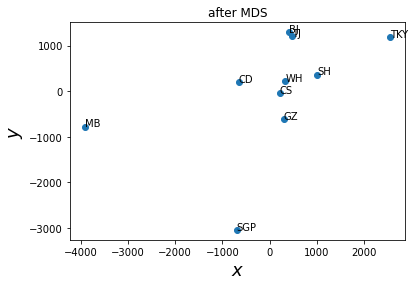

In [154]:
txt = ['SH','BJ','TJ','GZ','WH','CS','CD','SGP','TKY','MB']
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(-Z[:,0],-Z[:,1],cmap=plt.cm.hot)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
plt.title('after MDS')
for i in range(len(Z[:,0])):
    plt.annotate(txt[i],xy=(-Z[i,0],-Z[i,1]),xytext=(-Z[i,0],-Z[i,1]+0.5))
plt.show()